# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('C:\\Users\\\Robert\\.spyder-py3\\raw_data\\insurance2.csv') # changed this

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

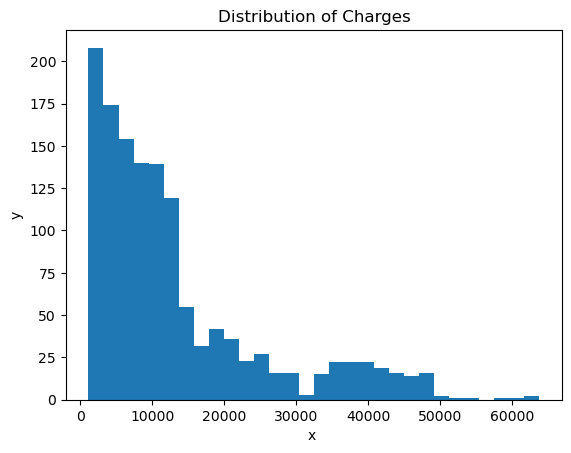

In [7]:
_ = plt.hist(medical['charges'], bins=30)
_ = plt.xlabel('x ')
_ = plt.ylabel('y')
_ = plt.title('Distribution of Charges')

In [9]:
charges_mean = np.mean(medical['charges'])
charges_std = np.std(medical['charges'])
print(charges_mean, charges_std)

13270.422265141257 12105.484975561605


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A: Use repeated sampling of say 50 draws and calculate the mean from the 50 samples drawn

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:  A one sided interval since we want to check for the probability of the mean being below $12,000

In [14]:
from scipy.stats import t
t_statistic = t.ppf(0.95, df=50)
# critical value t statistic
print(t_statistic)

1.6765508919142629


In [15]:
# The lower bound confidence interval is: 
lower_bound = charges_mean -(t_statistic * charges_std)
print(lower_bound)

-7025.039367691261


In [ ]:
# Therefore, the mean could go below $12,000 with 95% certainty and the hospital administrator should be concerned.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A: Null Hypothesis: People with insurance are charged the same amount as those without insurance.
Alternative Hypothesis: People with insurance are charged a different amount than those without insurance.

The assumption we're making is that both groups are independent, that there is a lack of systematic bias, and perhaps that the two groups are normally distributed.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [22]:
# Calculate the t-test statistic given by the above formula
# Calculate the mean charge for those with insurance
mean_charge_insurance = medical[medical['insuranceclaim'] == 1]['charges'].mean()

# Calculate the mean charge for those without insurance
mean_charge_no_insurance = medical[medical['insuranceclaim'] == 0]['charges'].mean()
print(mean_charge_insurance, mean_charge_no_insurance)

# Count the rows with insurance
insurance_count = medical[medical['insuranceclaim'] == 1].shape[0]    
# Count the rows without insurance
no_insurance_count = medical[medical['insuranceclaim'] == 0].shape[0]
t_numerator = mean_charge_insurance - mean_charge_no_insurance
t_denominator = np.sqrt((1/insurance_count) + (1/no_insurance_count) )
print(t_numerator, t_denominator, (t_numerator/t_denominator))

16423.928276537663 8821.421892306294
7602.506384231368 0.05548820604394679 137011.21240449123


In [24]:
# Run a t-test to compare the means
# Import the scipy.stats module
import scipy.stats as stats
stats.ttest_ind(medical[medical['insuranceclaim'] == 1]['charges'], medical[medical['insuranceclaim'] == 0]['charges'])

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

In [ ]:
#  the general definition of t-statistic was not givenn on p. 404 of AoS

In [ ]:
Conclusion:  A large t-value and a small p-value indicate that there is a significant difference between the means of the 
two datasets. This suggests that the null hypothesis can be rejected, and that the difference between 
the means is statistically significant.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A: Yes, the scipy.stats module provides a function for performing a z-test from a sample using the ztest function. The ztest function allows you to test a hypothesis about the mean of a population when the population standard deviation is known.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test